# Project: Gapminder World

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Brief**: In this report i have chosen to study data of employment in males and females, we'll be studying three datasets or indicators which will be: 1- The employment rate of 15+ males and females, 2- The employment rate of self-employed male and 3- employment rate of self-employed females. We'll be studying data from four different countries (Egypt, India, Germany and the united states of america) and we'll study these percentages on the period from (1999 till 2019)
>
> **Questions to be asked**: In this investigation we want to look at the growth of employment amongst males and females in countries in 4 different continents and see over the past 20 years has the percantges of employment increased or decreased? and has the percentages of self-employed male and female workers increased or decreased? and has freelancing became a major factor in self-employment?

In [200]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [201]:
df_employment = pd.read_csv('aged_15plus_employment_rate_percent.csv')
df_employment.head()

,country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,42.5,42.5,42.5,42.5,42.4,42.4,42.3,42.2,42.2,...,42.3,42.4,42.5,42.7,42.9,43.0,43.2,43.4,43.5,41.5
1,Angola,75.0,75.0,75.2,75.1,74.9,74.9,74.8,74.7,74.6,...,71.7,71.8,71.8,71.9,71.9,72.0,72.1,72.1,72.1,69.6
2,Albania,57.8,58.2,56.8,55.7,54.1,53.3,54.5,53.8,52.7,...,52.0,49.4,44.7,43.7,46.0,47.9,49.3,52.0,53.4,52.7
3,United Arab Emirates,71.8,72.2,72.9,73.4,73.8,73.3,73.1,73.3,73.7,...,81.7,81.5,81.3,81.3,81.6,81.2,80.3,80.3,80.2,76.9
4,Argentina,57.3,56.9,54.9,54.0,49.5,50.7,52.5,54.1,53.1,...,56.3,56.1,56.0,55.4,55.5,55.5,55.5,55.7,55.5,49.4


In [202]:
df_males = pd.read_csv('male_self_employed_percent_of_male_employment.csv')
df_males.head()

,country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,89.50,89.7,90.30,91.00,90.70,91.00,91.3,91.60,91.90,...,87.00,86.20,84.80,83.70,82.7,81.90,81.10,79.90,79.80,79.7
1,Angola,53.60,53.6,54.40,54.30,54.00,53.30,53.5,53.60,51.40,...,58.90,60.40,60.60,61.40,63.4,65.20,66.60,67.90,69.50,69.7
2,Albania,67.90,69.0,69.20,69.40,69.30,68.90,69.2,68.60,67.60,...,52.20,57.90,59.30,57.00,57.3,59.90,60.00,58.70,57.30,55.9
3,United Arab Emirates,3.19,3.2,3.22,3.22,3.22,3.21,3.2,3.24,3.25,...,4.19,3.97,3.79,3.64,3.5,3.39,3.26,3.67,4.02,4.8
4,Argentina,30.50,31.4,32.80,31.10,32.10,31.60,30.5,30.20,30.00,...,26.40,26.10,25.90,26.60,26.5,26.80,27.60,28.10,27.70,28.8


In [203]:
df_females = pd.read_csv('female_self_employed_percent_of_female_employment.csv')
df_females.head()

,country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,98.50,98.50,98.60,98.60,98.60,98.70,98.70,98.70,98.70,...,97.50,97.10,96.60,95.90,95.20,94.40,93.50,92.40,92.10,91.80
1,Angola,82.50,81.80,81.60,80.20,80.30,80.00,80.30,80.40,78.20,...,82.90,83.50,83.80,84.70,85.60,86.40,86.60,86.90,87.30,87.30
2,Albania,59.20,61.40,61.00,60.60,59.60,59.10,63.10,62.60,61.20,...,63.00,65.10,68.00,62.90,58.70,57.30,56.70,54.90,53.00,52.10
3,United Arab Emirates,1.13,1.13,1.13,1.13,1.13,1.13,1.13,1.13,1.14,...,1.01,1.09,1.14,1.19,1.24,1.25,1.31,2.49,3.74,5.64
4,Argentina,28.60,27.50,28.70,27.90,25.10,25.70,25.00,24.50,24.20,...,19.40,18.70,18.70,19.10,19.50,20.10,20.80,21.50,22.60,23.40


### Data Cleaning 
> in the first part of the cleaning we'll be removing the unwanted columns (any columns before 1999) and leave only the rows of Egypt, Inida, Germany and united states

In [204]:
df_employment = df_employment.loc[[177,43,49,76]]
df_employment.head()

,country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
177,United States,60.6,60.4,60.7,61.7,62.1,62.4,63.0,63.3,63.6,...,57.4,58.0,57.9,58.4,58.7,59.1,59.6,59.9,60.3,56.3
43,Germany,56.5,55.3,53.9,53.4,53.4,52.9,52.4,52.4,53.2,...,56.5,56.7,57.1,57.2,57.3,57.8,58.3,58.8,59.3,58.0
49,Egypt,42.3,42.5,41.6,42.4,41.4,41.8,41.6,41.3,42.7,...,43.0,43.0,43.1,43.1,41.7,41.8,41.0,40.5,40.5,38.5
76,India,55.1,55.1,55.0,55.0,54.9,54.8,54.6,54.5,54.3,...,50.3,49.4,49.0,48.5,48.1,47.6,47.2,46.8,46.7,43.0


In [205]:
df_employment.drop(df_employment.loc[:, '1991':'1998'].columns, axis = 1, inplace = True)
df_employment.drop('2020', axis = 1, inplace = True)
df_employment.head()

,country,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
177,United States,63.6,63.8,62.9,61.9,61.4,61.4,61.7,62.1,62.0,...,57.5,57.4,58.0,57.9,58.4,58.7,59.1,59.6,59.9,60.3
43,Germany,53.2,53.5,53.5,52.9,52.2,51.4,51.9,52.8,54.1,...,55.3,56.5,56.7,57.1,57.2,57.3,57.8,58.3,58.8,59.3
49,Egypt,42.7,42.0,41.4,40.6,40.6,41.4,41.4,42.1,43.9,...,44.8,43.0,43.0,43.1,43.1,41.7,41.8,41.0,40.5,40.5
76,India,54.3,54.2,54.3,54.4,54.5,54.7,54.9,54.2,53.5,...,51.1,50.3,49.4,49.0,48.5,48.1,47.6,47.2,46.8,46.7


In [206]:
df_males = df_males.loc[[177,43,49,76]]
df_males.head()

,country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
177,United States,10.8,10.6,10.8,10.2,9.88,9.74,9.54,9.23,8.89,...,8.33,7.96,7.75,7.47,7.37,7.45,7.43,7.08,7.23,6.97
43,Germany,10.9,11.4,11.8,12.3,12.30,12.60,13.00,13.10,13.10,...,14.20,14.40,14.30,13.90,13.50,13.40,12.80,12.50,12.20,11.90
49,Egypt,42.9,42.8,42.6,41.8,41.90,40.40,39.00,40.40,39.60,...,35.30,36.80,36.00,36.50,36.60,34.60,29.20,30.60,30.20,30.00
76,India,83.3,83.2,83.1,82.9,82.80,82.70,82.80,82.80,82.60,...,82.10,81.00,80.00,79.50,79.00,78.40,77.80,77.10,76.50,75.80


In [207]:
df_males.drop(df_males.loc[:, '1991':'1998'].columns, axis = 1, inplace = True)
df_males.head()

,country,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
177,United States,8.89,8.64,8.55,8.48,8.8,8.84,8.77,8.63,8.4,...,8.33,7.96,7.75,7.47,7.37,7.45,7.43,7.08,7.23,6.97
43,Germany,13.10,13.20,13.20,13.30,13.9,14.70,14.80,14.50,14.3,...,14.20,14.40,14.30,13.90,13.50,13.40,12.80,12.50,12.20,11.90
49,Egypt,39.60,39.40,39.30,41.50,41.8,41.80,37.90,36.30,38.6,...,35.30,36.80,36.00,36.50,36.60,34.60,29.20,30.60,30.20,30.00
76,India,82.60,82.60,82.60,82.80,82.7,82.60,82.60,82.50,82.3,...,82.10,81.00,80.00,79.50,79.00,78.40,77.80,77.10,76.50,75.80


In [208]:
df_females = df_females.loc[[177,43,49,76]]
df_females.head()

,country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
177,United States,6.79,6.34,6.34,7.07,6.96,6.87,6.76,6.41,6.18,...,5.58,5.50,5.59,5.57,5.36,5.26,5.16,5.28,5.17,5.08
43,Germany,7.95,8.09,8.33,8.37,8.50,7.99,8.12,8.16,7.78,...,8.42,8.49,8.34,8.10,7.98,7.75,7.65,7.55,7.29,6.98
49,Egypt,52.10,51.10,50.50,50.70,47.10,45.70,44.50,39.40,35.60,...,48.00,47.20,43.70,48.00,48.90,48.40,33.90,37.00,35.90,32.40
76,India,91.50,91.50,91.60,91.60,91.50,91.40,91.30,91.20,91.00,...,87.50,85.50,83.20,82.30,81.40,80.40,79.40,78.20,76.80,75.80


In [209]:
df_females.drop(df_females.loc[:, '1991':'1998'].columns, axis = 1, inplace = True)
df_females.head()

,country,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
177,United States,6.18,6.27,6.20,6.03,6.11,6.07,5.93,5.95,5.83,...,5.58,5.50,5.59,5.57,5.36,5.26,5.16,5.28,5.17,5.08
43,Germany,7.78,7.83,8.52,8.29,8.24,8.81,9.42,9.24,9.23,...,8.42,8.49,8.34,8.10,7.98,7.75,7.65,7.55,7.29,6.98
49,Egypt,35.60,42.90,35.20,32.10,43.70,51.50,49.50,46.40,52.20,...,48.00,47.20,43.70,48.00,48.90,48.40,33.90,37.00,35.90,32.40
76,India,91.00,90.90,90.60,90.30,90.00,89.70,89.30,88.90,88.60,...,87.50,85.50,83.20,82.30,81.40,80.40,79.40,78.20,76.80,75.80


### Now we'll check for any null or irrelvant data and deal with it


### Function for checking of any irrelevant data

In [210]:
def irr_data(file_name):
    return file_name.info()

In [211]:
irr_data(df_employment)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 177 to 76
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  4 non-null      object 
 1   1999     4 non-null      float64
 2   2000     4 non-null      float64
 3   2001     4 non-null      float64
 4   2002     4 non-null      float64
 5   2003     4 non-null      float64
 6   2004     4 non-null      float64
 7   2005     4 non-null      float64
 8   2006     4 non-null      float64
 9   2007     4 non-null      float64
 10  2008     4 non-null      float64
 11  2009     4 non-null      float64
 12  2010     4 non-null      float64
 13  2011     4 non-null      float64
 14  2012     4 non-null      float64
 15  2013     4 non-null      float64
 16  2014     4 non-null      float64
 17  2015     4 non-null      float64
 18  2016     4 non-null      float64
 19  2017     4 non-null      float64
 20  2018     4 non-null      float64
 21  2019     4 non-nu

In [212]:
irr_data(df_males)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 177 to 76
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  4 non-null      object 
 1   1999     4 non-null      float64
 2   2000     4 non-null      float64
 3   2001     4 non-null      float64
 4   2002     4 non-null      float64
 5   2003     4 non-null      float64
 6   2004     4 non-null      float64
 7   2005     4 non-null      float64
 8   2006     4 non-null      float64
 9   2007     4 non-null      float64
 10  2008     4 non-null      float64
 11  2009     4 non-null      float64
 12  2010     4 non-null      float64
 13  2011     4 non-null      float64
 14  2012     4 non-null      float64
 15  2013     4 non-null      float64
 16  2014     4 non-null      float64
 17  2015     4 non-null      float64
 18  2016     4 non-null      float64
 19  2017     4 non-null      float64
 20  2018     4 non-null      float64
 21  2019     4 non-nu

In [213]:
irr_data(df_females)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 177 to 76
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  4 non-null      object 
 1   1999     4 non-null      float64
 2   2000     4 non-null      float64
 3   2001     4 non-null      float64
 4   2002     4 non-null      float64
 5   2003     4 non-null      float64
 6   2004     4 non-null      float64
 7   2005     4 non-null      float64
 8   2006     4 non-null      float64
 9   2007     4 non-null      float64
 10  2008     4 non-null      float64
 11  2009     4 non-null      float64
 12  2010     4 non-null      float64
 13  2011     4 non-null      float64
 14  2012     4 non-null      float64
 15  2013     4 non-null      float64
 16  2014     4 non-null      float64
 17  2015     4 non-null      float64
 18  2016     4 non-null      float64
 19  2017     4 non-null      float64
 20  2018     4 non-null      float64
 21  2019     4 non-nu

### Now we'll move all our data in the columns and rename the columns names with relevant names

In [214]:
df_employment = df_employment.transpose()
df_employment = df_employment.rename({177: 'United States', 43: 'Germany', 49: 'Egypt', 76: 'India'}, axis=1) 
df_employment = df_employment.iloc[1: , :]
df_employment.index.name = 'Year'
df_employment.reset_index(inplace=True)
df_employment.head()

,Year,United States,Germany,Egypt,India
0,1999,63.6,53.2,42.7,54.3
1,2000,63.8,53.5,42.0,54.2
2,2001,62.9,53.5,41.4,54.3
3,2002,61.9,52.9,40.6,54.4
4,2003,61.4,52.2,40.6,54.5


In [215]:
df_males = df_males.transpose()
df_males = df_males.rename({177: 'United States', 43: 'Germany', 49: 'Egypt', 76: 'India'}, axis=1) 
df_males = df_males.iloc[1: , :]
df_males.index.name = 'Year'
df_males.reset_index(inplace=True)
df_males.head()

,Year,United States,Germany,Egypt,India
0,1999,8.89,13.1,39.6,82.6
1,2000,8.64,13.2,39.4,82.6
2,2001,8.55,13.2,39.3,82.6
3,2002,8.48,13.3,41.5,82.8
4,2003,8.8,13.9,41.8,82.7


In [216]:
df_females = df_females.transpose()
df_females = df_females.rename({177: 'United States', 43: 'Germany', 49: 'Egypt', 76: 'India'}, axis=1) 
df_females = df_females.iloc[1: , :]
df_females.index.name = 'Year'
df_females.reset_index(inplace=True)
df_females.head()

,Year,United States,Germany,Egypt,India
0,1999,6.18,7.78,35.6,91.0
1,2000,6.27,7.83,42.9,90.9
2,2001,6.2,8.52,35.2,90.6
3,2002,6.03,8.29,32.1,90.3
4,2003,6.11,8.24,43.7,90.0


### Finnally we'll change the data types into integers and floats so we could apply our analysis on them

In [217]:
df_employment["Year"] = df_employment["Year"].astype(str).astype(int)
df_employment["United States"] = df_employment["United States"].astype(str).astype(float)
df_employment["Germany"] = df_employment["Germany"].astype(str).astype(float)
df_employment["Egypt"] = df_employment["Egypt"].astype(str).astype(float)
df_employment["India"] = df_employment["India"].astype(str).astype(float)
df_employment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           21 non-null     int32  
 1   United States  21 non-null     float64
 2   Germany        21 non-null     float64
 3   Egypt          21 non-null     float64
 4   India          21 non-null     float64
dtypes: float64(4), int32(1)
memory usage: 884.0 bytes


In [218]:
df_males["Year"] = df_males["Year"].astype(str).astype(int)
df_males["United States"] = df_males["United States"].astype(str).astype(float)
df_males["Germany"] = df_males["Germany"].astype(str).astype(float)
df_males["Egypt"] = df_males["Egypt"].astype(str).astype(float)
df_males["India"] = df_males["India"].astype(str).astype(float)
df_males.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           21 non-null     int32  
 1   United States  21 non-null     float64
 2   Germany        21 non-null     float64
 3   Egypt          21 non-null     float64
 4   India          21 non-null     float64
dtypes: float64(4), int32(1)
memory usage: 884.0 bytes


In [219]:
df_females["Year"] = df_females["Year"].astype(str).astype(int)
df_females["United States"] = df_females["United States"].astype(str).astype(float)
df_females["Germany"] = df_females["Germany"].astype(str).astype(float)
df_females["Egypt"] = df_females["Egypt"].astype(str).astype(float)
df_females["India"] = df_females["India"].astype(str).astype(float)
df_females.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           21 non-null     int32  
 1   United States  21 non-null     float64
 2   Germany        21 non-null     float64
 3   Egypt          21 non-null     float64
 4   India          21 non-null     float64
dtypes: float64(4), int32(1)
memory usage: 884.0 bytes


### Since we want to study each indicator alone and then relate the results we don't need anymore cleaning of the data

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

# Has the percentage of employment increased or decreased in our adressed countries?


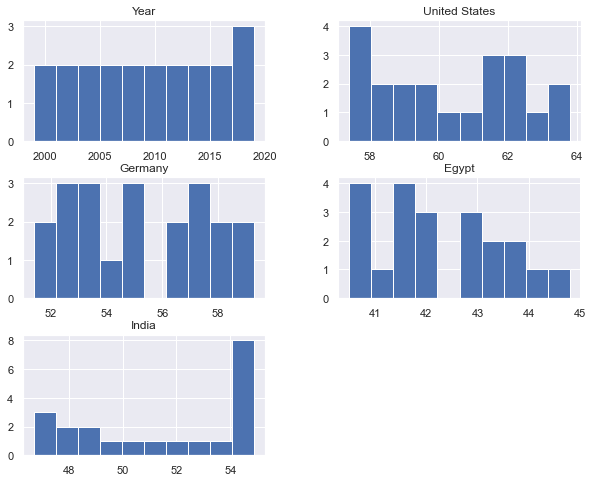

In [220]:
df_employment.hist(figsize=(10,8));

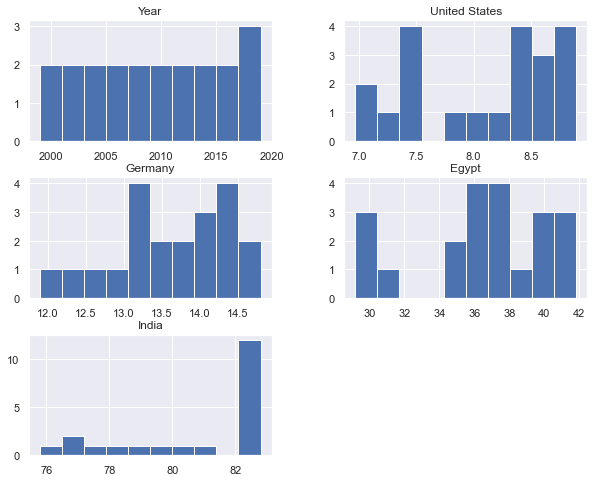

In [221]:
df_males.hist(figsize=(10,8));

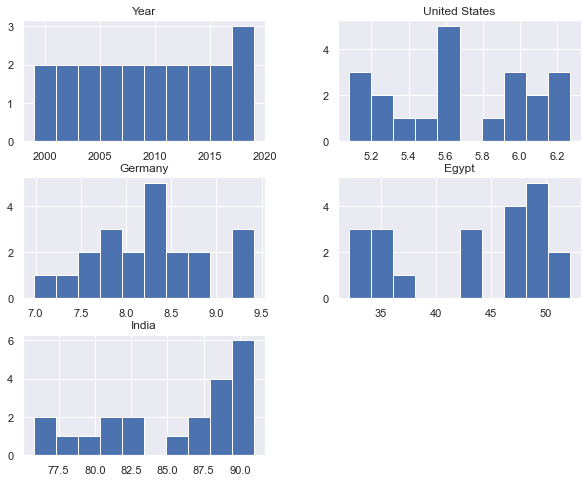

In [222]:
df_females.hist(figsize=(10,8));

Text(0.5, 1.0, 'Perncentage Of Employment Variation From 2000 to 2020')

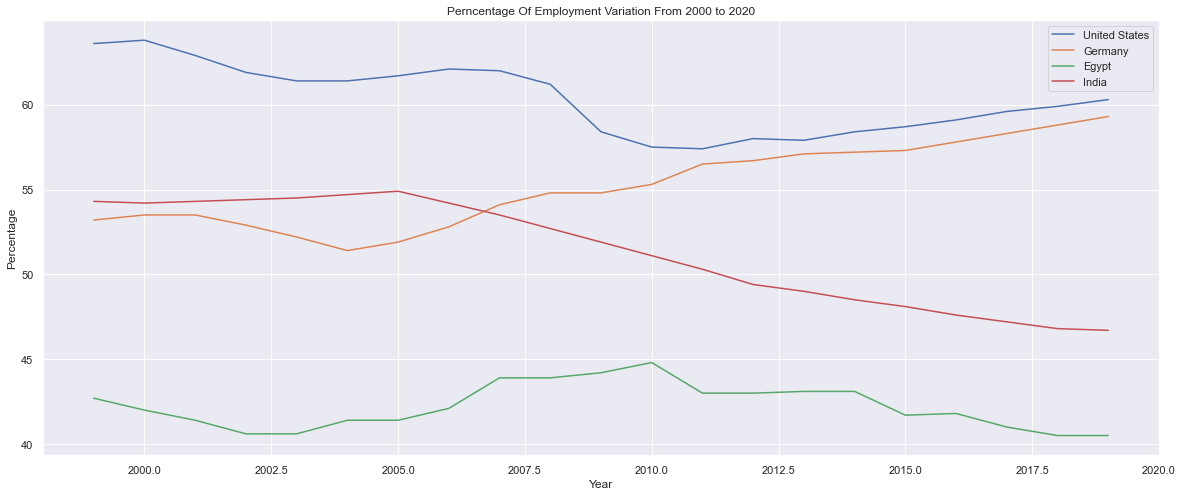

In [223]:
ax = plt.gca()
df_employment.plot( x = 'Year' , y = 'United States', ax = ax, figsize=(20,8))
df_employment.plot( x = 'Year' , y = 'Germany' , ax = ax, figsize=(20,8))
df_employment.plot( x = 'Year' , y = 'Egypt', ax = ax, figsize=(20,8))
df_employment.plot( x = 'Year' , y = 'India' , ax = ax, figsize=(20,8))
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Perncentage Of Employment Variation From 2000 to 2020")

## Analysis of the above data
> We could see from the above data that Egypt has the lowest percentage of working people over the past 20 years while USA has the highest.
> We could also see that India had nearly 55% working capacity but started to gradually decrease sice 2004 till it reasched 43%
> We could realize that Germany's working percentage had a gradual increase since 2003 for nearly 8% 

# Has the percentage of self-employed males increased or decreased in our adressed countries?

Text(0.5, 1.0, 'Perncentage Of Self-Employed Males Variation From 2000 to 2020')

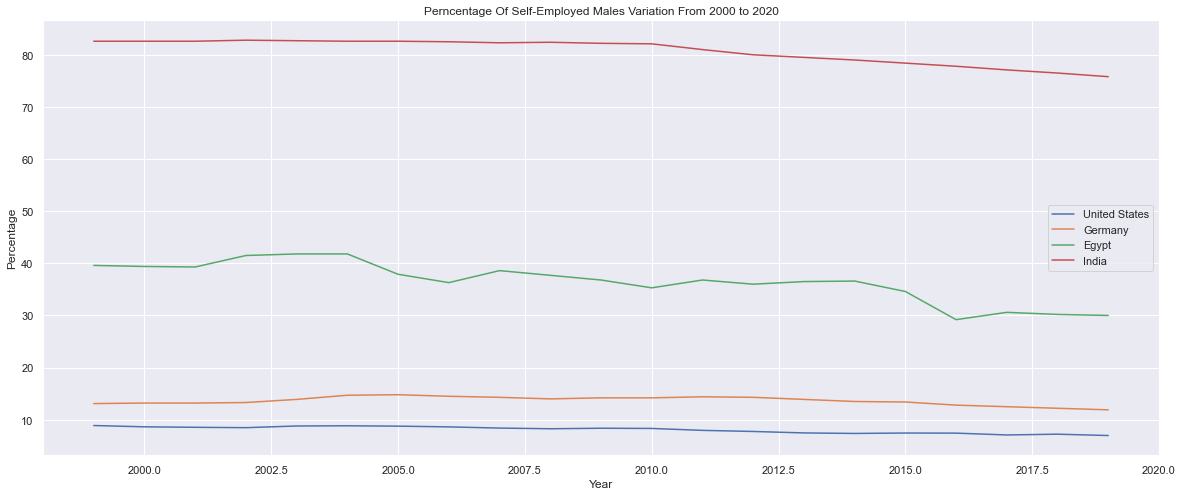

In [224]:
ax = plt.gca()
df_males.plot( x = 'Year' , y = 'United States', ax = ax, figsize=(20,8))
df_males.plot( x = 'Year' , y = 'Germany' , ax = ax, figsize=(20,8))
df_males.plot( x = 'Year' , y = 'Egypt', ax = ax, figsize=(20,8))
df_males.plot( x = 'Year' , y = 'India' , ax = ax, figsize=(20,8))
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Perncentage Of Self-Employed Males Variation From 2000 to 2020")

### Analysis of the above data
> We could see that there is a kind of sustainability in the percentages of self employed males over the addresed countries, Only Egypt seems to have some variations and a slight decrease over the past few years, as well as India which also had a slight decrease 
> We could see that USA has the lowest percentages of self-employed males and India has a very high percentage with over 75%

# Has the percentage of self-employed females increased or decreased in our adressed countries?

Text(0.5, 1.0, 'Perncentage Of Self-Employed Femlaes Variation From 2000 to 2020')

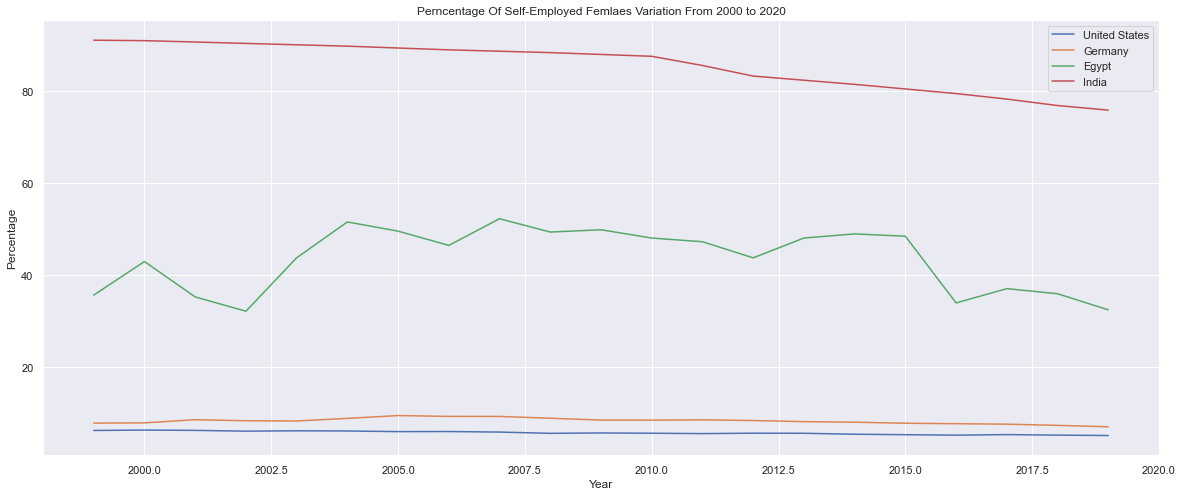

In [225]:
ax = plt.gca()
df_females.plot( x = 'Year' , y = 'United States', ax = ax, figsize=(20,8))
df_females.plot( x = 'Year' , y = 'Germany' , ax = ax, figsize=(20,8))
df_females.plot( x = 'Year' , y = 'Egypt', ax = ax, figsize=(20,8))
df_females.plot( x = 'Year' , y = 'India' , ax = ax, figsize=(20,8))
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Perncentage Of Self-Employed Femlaes Variation From 2000 to 2020")

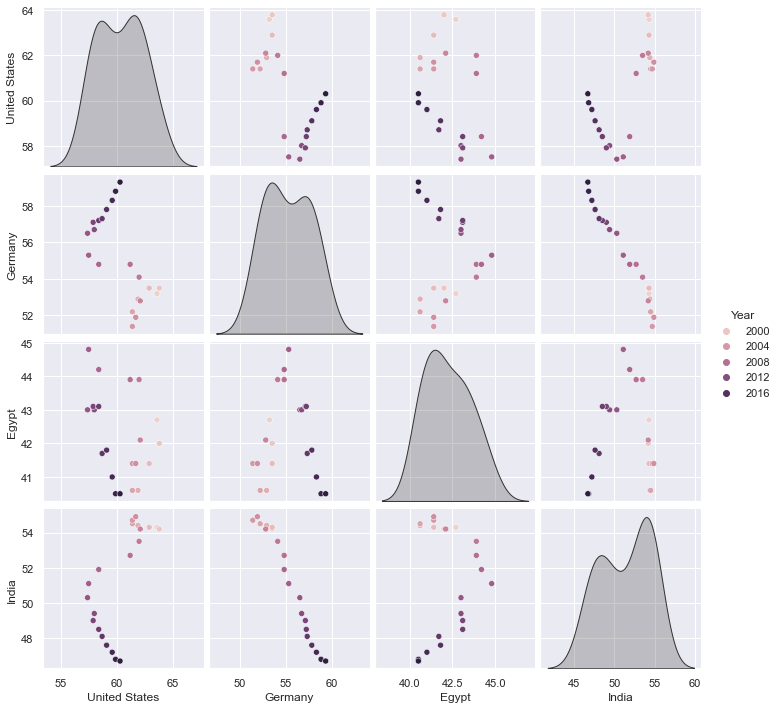

In [226]:
sns.pairplot(data=df_employment, hue="Year", diag_kws={"hue": None, "color": ".2"})

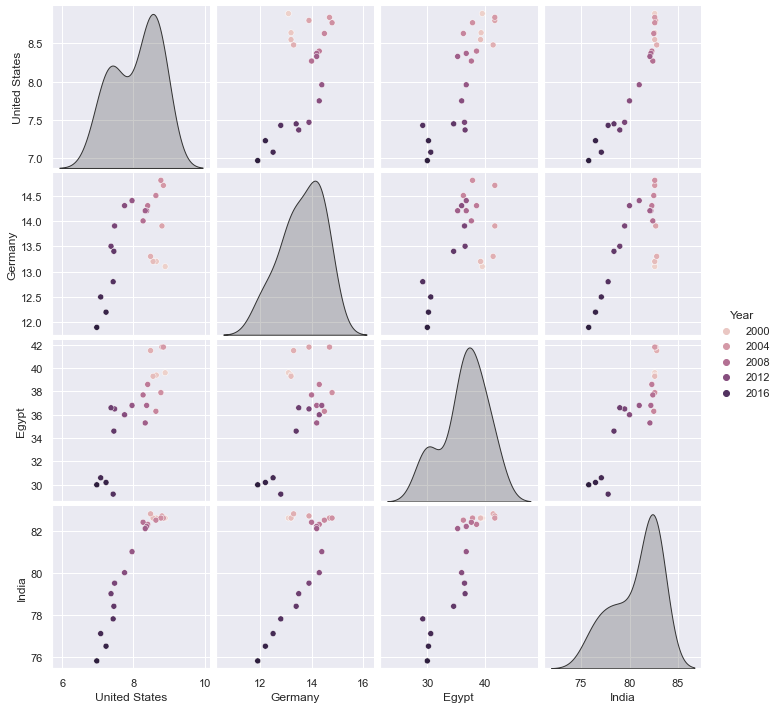

In [227]:
sns.pairplot(data=df_males, hue="Year", diag_kws={"hue": None, "color": ".2"})

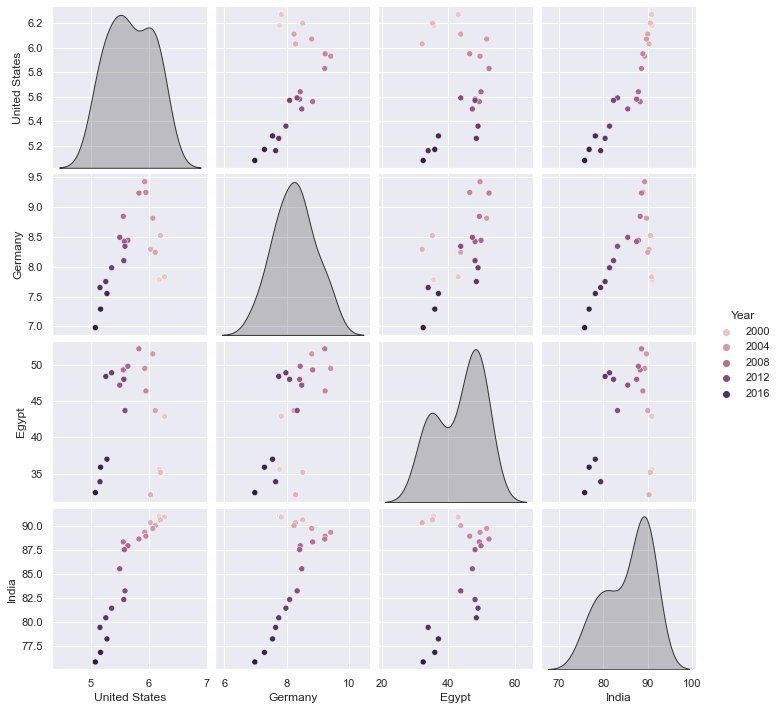

In [228]:
sns.pairplot(data=df_females, hue="Year", diag_kws={"hue": None, "color": ".2"})

### Analysis of the above data
> We could see that there is a kind of sustainability in the percentages of self employed females over the addresed countries exept Egypt. 
> There is a great variation in the statistics in Egypt where from years 2002 till 2005 there was a great increase in the percentages of self-employed females but it then went to decrease again
> We could see that USA has the lowest percentages of self-employed females and India has a very high percentage with over 75%

# Data Comparison between Egypt and the United States

[Text(0.5, 1.0, 'Percentage count of number of working people in Egypt in the past 20 years')]

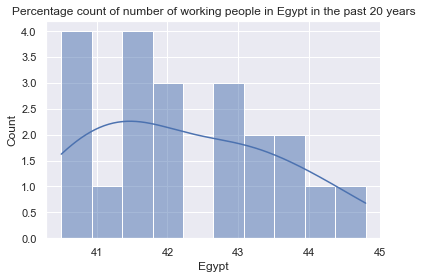

In [229]:
sns.histplot(data=df_employment, x="Egypt", kde=True, bins=10).set(title="Percentage count of number of working people in Egypt in the past 20 years")

[Text(0.5, 1.0, 'Percentage count of number of working people in the United States in the past 20 years')]

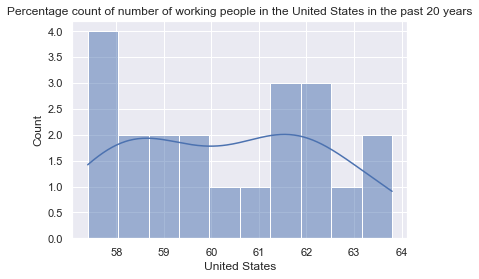

In [230]:
sns.histplot(data=df_employment, x="United States", kde=True, bins=10).set(title="Percentage count of number of working people in the United States in the past 20 years")

[Text(0.5, 1.0, 'Percentage count of number of self-employed males in Egypt in the past 20 years')]

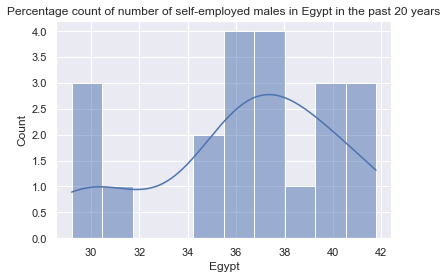

In [231]:
sns.histplot(data=df_males, x="Egypt", kde=True, bins=10).set(title="Percentage count of number of self-employed males in Egypt in the past 20 years")

[Text(0.5, 1.0, 'Percentage count of number of self-employed males in the United States in the past 20 years')]

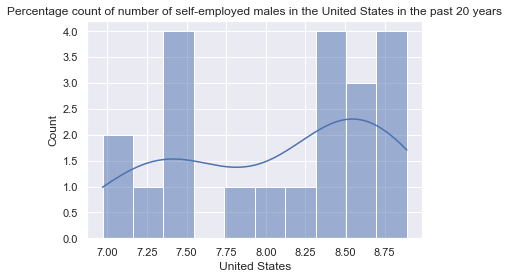

In [232]:
sns.histplot(data=df_males, x="United States", kde=True, bins=10).set(title="Percentage count of number of self-employed males in the United States in the past 20 years")

[Text(0.5, 1.0, 'Percentage count of number of self-employed females in Egypt in the past 20 years')]

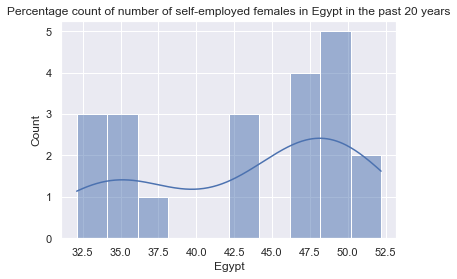

In [233]:
sns.histplot(data=df_females, x="Egypt", kde=True, bins=10).set(title="Percentage count of number of self-employed females in Egypt in the past 20 years")

[Text(0.5, 1.0, 'Percentage count of number of self-employed females in the United States in the past 20 years')]

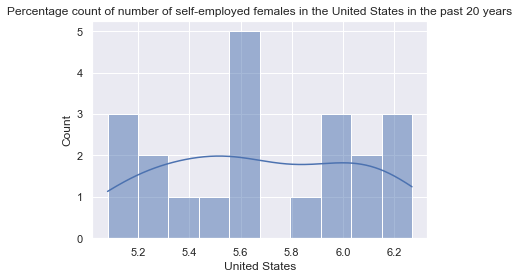

In [234]:
sns.histplot(data=df_females, x="United States", kde=True, bins=10).set(title="Percentage count of number of self-employed females in the United States in the past 20 years")

### Analysis of the above data
> We could see that the percentage count of working people in Egypt is much lower than that of the United States
> We could also see that the percentage count of self-employed males and females in Egypt is much higher than that of the United States

<a id='conclusions'></a>
## Conclusions

> From the above we could realize that countries with the highest rate of employment have very low rate of self-employment, while other countries like India which have low rate of employment have very high rate of self-employment

> Freelancing effect hasn't yet appeared as for both males and females the self-employment percentage hasn't increased and isn't showing any indication of increasement yet amongost the specified countries, maybe over the following years there could be and increase as freelancing is very willing sector.

> Regarding the limitations: choosing this data was based on choosing four different countries from four different continents and the choice of the past 20 years was based on making the data new as much as possible to relate it to freelancing which is a new topic, Maybe choosing more years would be more relevant but there were so many data missing regarding the working percentages in these years specially in Egypt and India, so i prefered using the past 20 years where nearly all countries have their data included. 

> My future steps could be: Studying other countries that my have a high freelancing rate like philipines, i may also try choosing more factors of comparison like the unemployment percentage to understand more why precentages are varying like that between countries of high employment rate which have very low self emlpoyment. One more thing could be increasing the number of years of study and trying to find other sources of data for these years so that the study is more effective. 

